## Attendance Details

Here we go beyond the simple would-you wouldn't you?

In [1]:
from config import survey, default_color, all_stops, plot_wordcloud, make_wordcloud
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt

In [2]:
def build_attend(brush = None, selection = None):

    c = alt.Chart(data=survey, title="Would you attend?")
    if brush is not None:
        c = c.transform_filter(brush)

    color = default_color if selection is None else alt.condition(selection, default_color, alt.value('orange'))

    attend_histo = (
        c
        .transform_joinaggregate(total='count(*)')
        .transform_calculate(pct='1 / datum.total')
        .mark_bar()
        .encode(
            x=alt.X(shorthand="count(attend)"),
            y=alt.Y(shorthand="attend:N", title="", sort="-x"),
            color = color
        )
    )

    attend_text = (
        attend_histo.mark_text(align="right", dx=-3)
                    .encode(
                        text=alt.Text("sum(pct):Q", format=".0%"),
                        color=alt.value("white")
                    )
    )

    if selection is not None:
        attend_histo = attend_histo.add_selection(selection)

    return attend_histo + attend_text

build_attend()

alt.LayerChart(...)

### Who is coming?

This is an interactive plot that does a break down by rank. Click on the rank histograms to see the fractions of people.

In [3]:
brush = alt.selection_single(encodings=['y'])
chart_w = (alt.Chart(data=survey, title="What am I?")
    .mark_bar()
    .encode(
        y=alt.Y(shorthand="job_rank:N", sort='-x', title=""),
        x=alt.X(shorthand="count()",title="Number of people"),
        tooltip=alt.Tooltip("count():N"),
        color=alt.condition(brush, default_color, alt.value('orange'))
    )
    .add_selection(brush)
)

attend = build_attend(brush)

chart_w & attend

alt.VConcatChart(...)

A few things notable from clicking through the "What am I":

* Accross the board, about 50% of each population wants to attend. There are very small variations.
* Going from tenured, to untenured, to grad student larger and larger fractions want to attend (when taking might and would together).
* Post-docs and research scientists seem to be an anomoly here - a larger fraction say they are not interested in attending.

In [4]:
brush = alt.selection_single(encodings=['y'])

chart_e = (alt.Chart(data=survey, title="Who Employed Me?")
    .mark_bar()
    .encode(
        y=alt.Y(shorthand="employed_by:N", sort='-x', title=""),
        x=alt.X(shorthand="count()",title="Number of people"),
        tooltip=alt.Tooltip("count():N"),
        color=alt.condition(brush, default_color, alt.value('orange'))
    )
    .add_selection(brush)
)

attend = build_attend(brush)

chart_e & attend

alt.VConcatChart(...)

Form clicking through here:

* The groups most positive they want to attend are people from US National Labs and from Canada (63% and 67%) - note that Canada has fairly small statistics.
* Non-EU and Unknown are both about 40%
* University members are around 50%

A lot of people left us text comments. We can summarize them by looking at wordls' of the responses. First, with everyone piled in together:

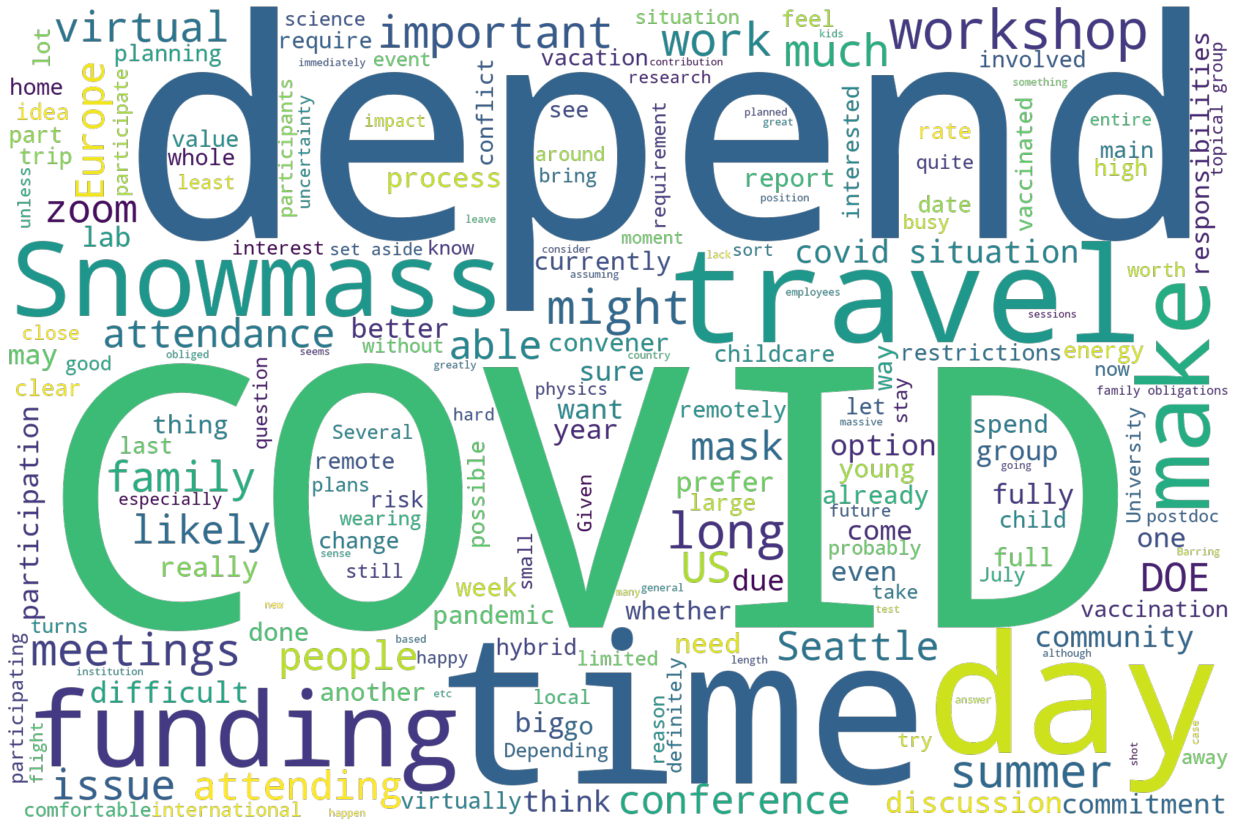

In [5]:
plot_wordcloud(make_wordcloud(survey['attend_feedback'], ['attend', 'person', 'meeting']))

Lets split the data in that word cloud into the three categories to see if we can gain some ideas of what people are thinking about their response. First, here is **would attend**:

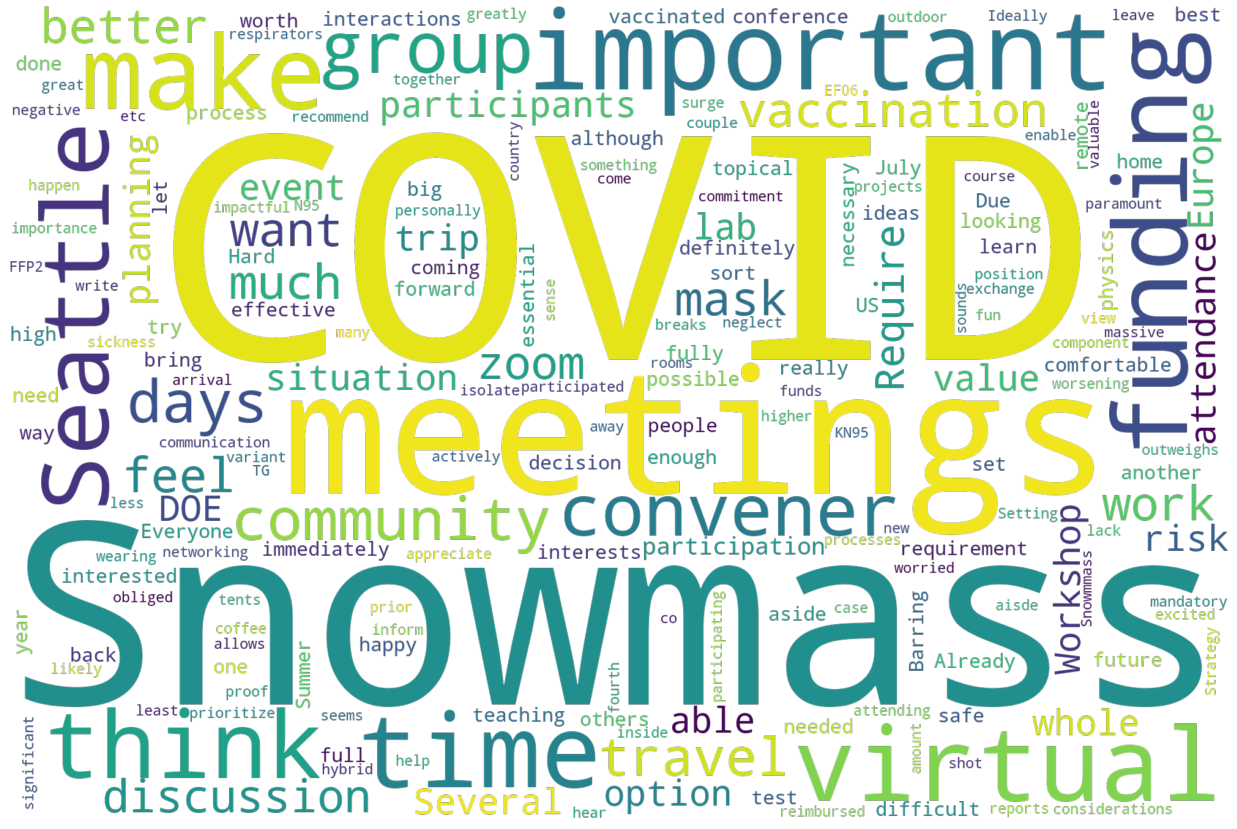

In [6]:
plot_wordcloud(make_wordcloud(survey[survey['attend'] == 'Would attend']['attend_feedback'], ['attend', 'person', 'meeting']))

Next, here is **might attend**:

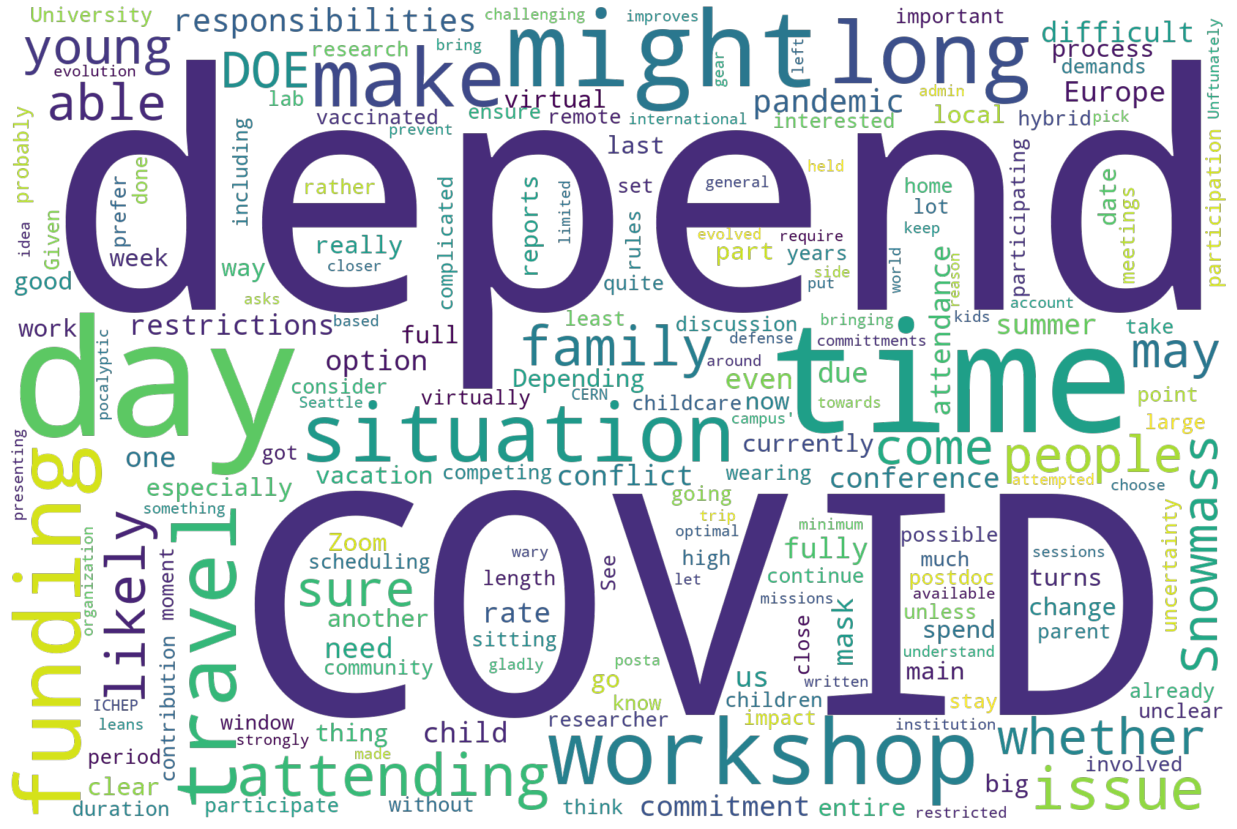

In [7]:
plot_wordcloud(make_wordcloud(survey[survey['attend'] == 'Might attend']['attend_feedback'], ['attend', 'person', 'meeting']))

And finally, here is **would not attend**:

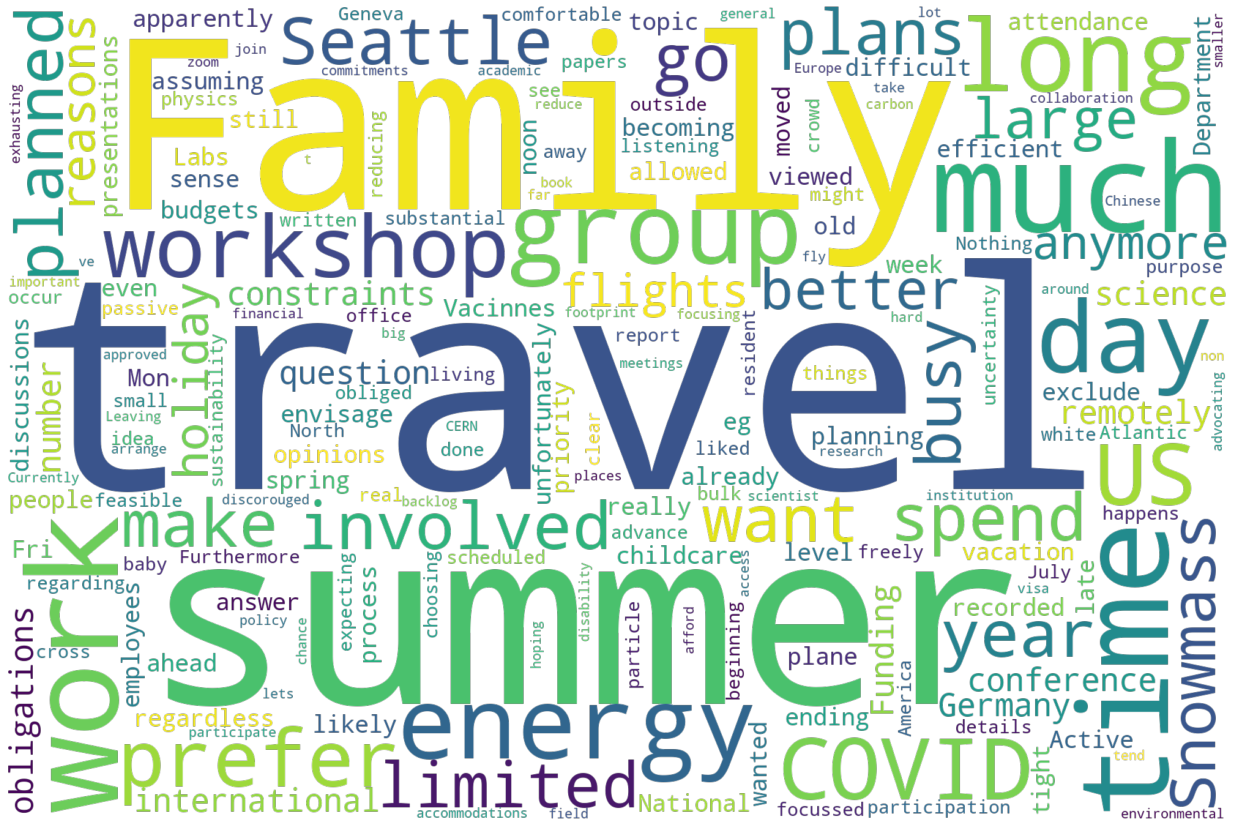

In [8]:
plot_wordcloud(make_wordcloud(survey[survey['attend'] == 'Would not attend']['attend_feedback'], ['attend', 'person', 'meeting']))

Summarizing some of what we see above, and going into the quotes with these words as a guide, it is possible to paraphrase some of the responses (we promised not to transcribe word-for-word the data):

* Would Attend
    * COVID is mentioned a lot - in the sense that the person wants to attend, but COVID would get in the way of it.
    * Funding is mentioned in the same way
    * Great experience at previous Snowmass mentioned, and that we need to do this once in a while for the community.
    * Topical Group Conv - thus it is important for me to attend
    * Most effective work occurs in person
    * DOE will approve this, eventually.
* Might
    * DOE will not allow it
    * Long trip: time, funding, etc.
    * Possible Family Vacation Conflicts
    * What is the point since all topical groups will have their reports done - seems like a very long regular conference.
* Would Not Attend
    * DOE will not allow it
    * Family plans conflict (vacations, etc.)
    * Budgets are very tight for this sort of thing
    * International Travel too far for this
    * Arranging accomodations for disability take too much work/energy
    Cost 


And some suggestions or organization from the text:

* Pre-record presentations, and reserve time for discussion only. Use this as a way to shorten the actual meeting time.

## Dinner?

Curical for planning, but likely not much else, is dinner.

In [9]:
brush = alt.selection_single(encodings=['y'])

attend = build_attend(selection=brush)

chart_d = (alt.Chart(data=survey, title="Dinner?")
    .transform_filter(brush)
    .transform_joinaggregate(total='count(*)')
    .transform_calculate(pct='1 / datum.total')
    .mark_bar()
    .encode(
        y=alt.Y(shorthand="dinner:N", sort='-x', title=""),
        x=alt.X(shorthand="count()",title="Number of people"),
        tooltip=alt.Tooltip("sum(pct):N", format=".0%"),
        color=default_color
    )
)

chart_d_text = (
    chart_d.mark_text(align="right", dx=-3)
           .encode(
               text=alt.Text("sum(pct):N", format=".0%"),
               color=alt.value("white")
           )

)

attend & (chart_d + chart_d_text)

alt.VConcatChart(...)

The most interesting thing here is that for people that are coming, nearly 80% want to attend the dinner.